In [1]:
# Importazione librerie 
import pandas as pd    
import numpy as np    
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Lettura dataset da file csv
dataset = pd.read_csv('/content/DataSet/predictive_maintenance.csv')

In [3]:
# Verifica importazione dataset
dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
# Eliminazione dati non utili (UDI e Product ID)
dataset = dataset.drop(["UDI",'Product ID'], axis = 1)
dataset.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
# Analisi statistica filtrando i valori che ci interessano
dataset.describe().loc[['mean', 'std', 'min', '50%', 'max']]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
# Analisi delle frequenze assolute relative ad ogni tipo di fallimento
dataset.groupby(['Target', 'Failure Type']).count().drop(['Process temperature [K]',
                                                         'Rotational speed [rpm]',
                                                         'Torque [Nm]',
                                                         'Tool wear [min]',
                                                         'Air temperature [K]'], axis = 1).rename(columns = {'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

In [7]:
# Calcolo mediana per ogni tipologia di fallimento 
dataset.groupby(['Target', 'Failure Type']).median()

Air temperature [K]  Process temperature [K]  \
Target Failure Type                                                             
0      No Failure                             300.00                    310.0   
       Random Failures                        300.75                    311.1   
1      Heat Dissipation Failure               302.45                    310.7   
       No Failure                             300.50                    309.9   
       Overstrain Failure                     299.45                    310.1   
       Power Failure                          300.40                    310.2   
       Tool Wear Failure                      300.40                    310.3   

                                 Rotational speed [rpm]  Torque [Nm]  \
Target Failure Type                                                    
0      No Failure                                1507.0        39.80   
       Random Failures                           1490.0        44.60   
1      Heat Dissipation Failure                  1346.0        52.35   
       No Failure                                1438.0        45.20   
       Overstrain Failure                        1362.5        56.75   
       Power Failure                             1386.0        63.60   
       Tool Wear Failure                         1521.0        37.70   

                                 Tool wear [min]  
Target Failure Type                               
0      No Failure                          107.0  
       Random Failures                     142.0  
1      Heat Dissipation Failure            106.0  
       No Failure                          119.0  
       Overstrain Failure                  207.0  
       Power Failure                       100.0  
       Tool Wear Failure                   215.0

In [8]:
# Calcolo mediana per tipologia macchinario 
dataset.groupby(['Type', 'Target']).median()

Air temperature [K]  Process temperature [K]  \
Type Target                                                 
H    0                     299.7                    309.9   
     1                     302.0                    310.2   
L    0                     300.1                    310.1   
     1                     301.2                    310.4   
M    0                     300.1                    310.0   
     1                     302.0                    310.6   

             Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Type Target                                                        
H    0                       1502.0         40.2            106.0  
     1                       1371.0         53.8            147.0  
L    0                       1508.0         39.7            107.0  
     1                       1362.0         53.9            182.0  
M    0                       1506.0         40.0            105.0  
     1                       1372.0         51.6            125.0

In [9]:
# Codifichiamo tipo di macchinario e tipo di guasto in un unica soluzione
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

oHe = OneHotEncoder(sparse = False) 
le = LabelEncoder() 

tipo = oHe.fit_transform(dataset[["Type"]])
fallimento = le.fit_transform(dataset[["Failure Type"]])

data = dataset.drop(columns = ["Type", "Failure Type"])

tipo_df = pd.DataFrame(tipo, columns = ["H", "L", "M"])
fallimento_df = pd.DataFrame(fallimento, columns = ["Failure Type"])

dataset_concat = pd.concat([tipo_df, data, fallimento_df], axis = 1)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

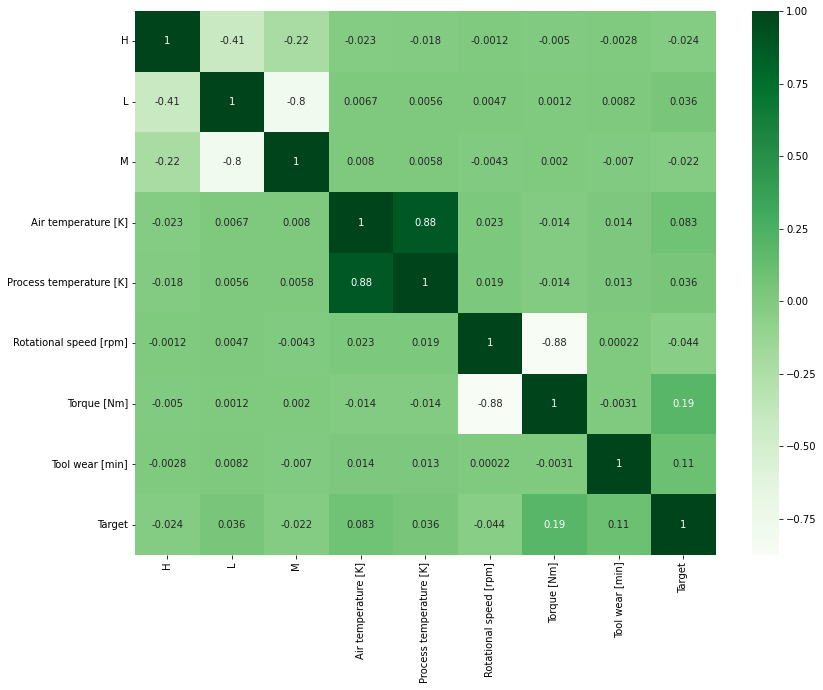

In [10]:
# Rappresentazione grafica matrice correlazione
fig, ax = plt.subplots(figsize = (13, 10))
sns.heatmap(dataset_concat.iloc[:,:9].corr(), annot = True, ax = ax, cmap = "Greens")

<AxesSubplot:>

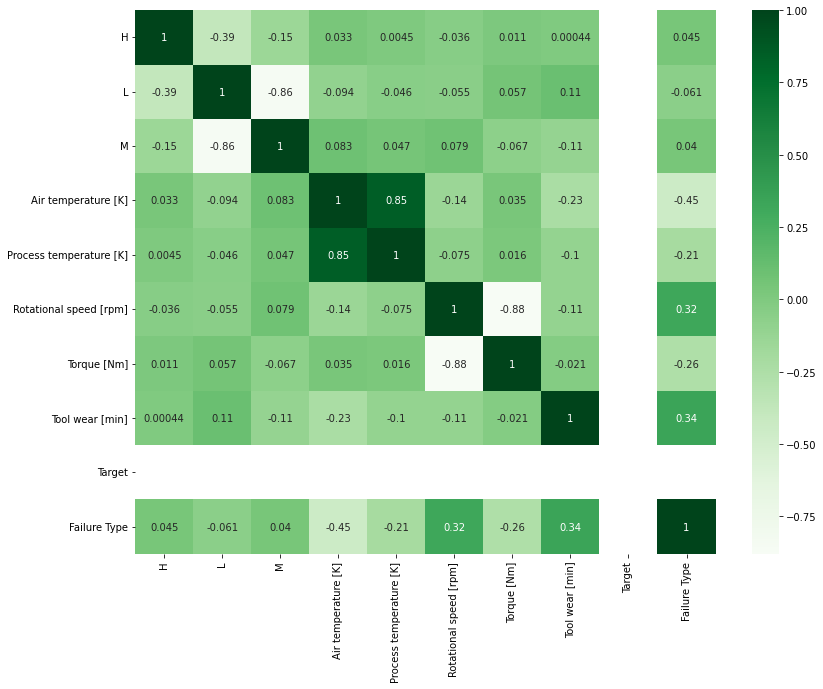

In [11]:
# Rappresentazione grafica matrice di correlazione con i tipi di fallimento
tFallimento = dataset_concat[dataset_concat["Target"] == 1]

fig, ax = plt.subplots(figsize = (13, 10))
sns.heatmap(tFallimento.corr(), annot = True, ax = ax, cmap = "Greens")

In [12]:
# Rappresentazione grafica della distribuzione di fallimenti oppure no su tutto il dataset
import plotly.graph_objects as go 
import plotly.express as px 

fig = px.pie(dataset, 
             title = 'Fallimento No[0] - Si[1]', 
             names = 'Target',
             hole = .3,
             color = 'Target',
             color_discrete_sequence = ["#AFE1AF", "green"])
fig.show()

In [13]:
# Rappresentazione grafica tipologia fallimenti 
import plotly.graph_objects as go 
import plotly.express as px 
fig = px.pie(dataset[dataset['Target'] == 1], 
             title = 'Tipi di fallimento', 
             names = 'Failure Type',
             color_discrete_sequence = px.colors.sequential.algae) 
fig.show()

In [14]:
def prob(feature, dataset):
    x,y = [], []
    for j in dataset[feature].unique():
        temp = dataset
        temp = temp[temp[feature] >= j]
        y.append(round((temp.Target.mean() * 100), 2))
        x.append(j)
    return(x, y)

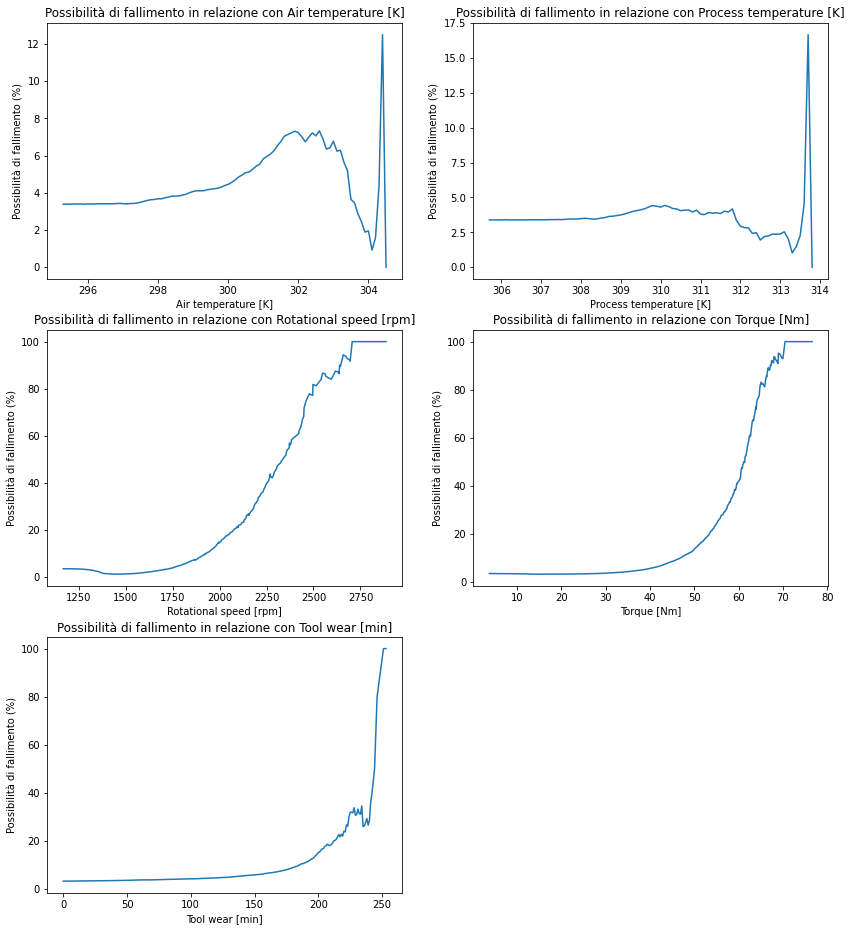

In [15]:
# Rappresentazione grafica possibilità di fallimento correlata alle varie feature
plt.figure(figsize = (14, 16))
m = 1

for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3, 2, m).set_title(label = ("Possibilità di fallimento in relazione con " + i))
    x, y = prob(i, dataset)
    plt.xlabel(i)
    plt.ylabel("Possibilità di fallimento (%)")
    sns.lineplot(y = y, x = x)
    m += 1

In [16]:
from scipy.special import exp10
# Correlazione tra la temperatura dell'aria e il tipo di fallimento con Target = 1

# Relazione dei tipi di fallimenti (Random Failures e No Failure)
exp1 = dataset[dataset['Failure Type'] != 'No Failure']
dataFilter = exp1[exp1['Failure Type'] != 'Random Failures']


fig = px.box(dataFilter,
             y      =  "Air temperature [K]",
             x      =  "Failure Type",
             title  =  "Relazione Temperatura dell'Aria[K] con tipo di fallimento",
             color  =  "Failure Type",
             width  =  900,
             height =  400)
fig.show()

# Relazione temperatura di processo e tipo fallimento
fig = px.box(dataFilter,
             y      =  "Process temperature [K]",
             x      =  "Failure Type",
             title  =  "Relazione Temperatura di Processo[K] con tipo di fallimento",
             color  =  "Failure Type",
             width  =  900,
             height =  400)
fig.show()

# Relazione velocità rotazione con tipo fallimento
fig = px.box(dataFilter,
             y      =  "Air temperature [K]",
             x      =  "Failure Type",
             title  =  "Relazione Velocità di Rotazione[rpm] con tipo di fallimento ",
             color  =  "Failure Type",
             width  =  900,
             height =  400)
fig.show()

# Relazione Coppia [Nm] con tipo di fallimento
fig = px.box(dataFilter,
             y      =  "Torque [Nm]",
             x      =  "Failure Type",
             title  =  "Relazione Coppia[Nm] con tipo di fallimento",
             color  =  "Failure Type",
             width  =  900,
             height =  400)
fig.show()

# Relazione usura strumenti [min] con tipo di fallimento
fig = px.box(dataFilter,
             y      =  "Tool wear [min]",
             x      =  "Failure Type",
             title  =  "Relazione Usura Strumenti[min] con tipo di fallimento",
             color  =  "Failure Type",
             width  =  900,
             height =  400)
fig.show()

In [17]:
# Correlazione tra Product Id e i fallimenti
pd.pivot_table(dataset,
               index   = 'Failure Type', 
               columns = 'Type', 
               aggfunc = 'count')

Air temperature [K]              \
Type                                       H     L     M   
Failure Type                                               
Heat Dissipation Failure                   8    74    30   
No Failure                               979  5757  2916   
Overstrain Failure                         1    73     4   
Power Failure                              5    59    31   
Random Failures                            4    12     2   
Tool Wear Failure                          6    25    14   

                         Process temperature [K]              \
Type                                           H     L     M   
Failure Type                                                   
Heat Dissipation Failure                       8    74    30   
No Failure                                   979  5757  2916   
Overstrain Failure                             1    73     4   
Power Failure                                  5    59    31   
Random Failures                                4    12     2   
Tool Wear Failure                              6    25    14   

                         Rotational speed [rpm]             Target        \
Type                                          H     L     M      H     L   
Failure Type                                                               
Heat Dissipation Failure                      8    74    30      8    74   
No Failure                                  979  5757  2916    979  5757   
Overstrain Failure                            1    73     4      1    73   
Power Failure                                 5    59    31      5    59   
Random Failures                               4    12     2      4    12   
Tool Wear Failure                             6    25    14      6    25   

                               Tool wear [min]             Torque [Nm]        \
Type                         M               H     L     M           H     L   
Failure Type                                                                   
Heat Dissipation Failure    30               8    74    30           8    74   
No Failure                2916             979  5757  2916         979  5757   
Overstrain Failure           4               1    73     4           1    73   
Power Failure               31               5    59    31           5    59   
Random Failures              2               4    12     2           4    12   
Tool Wear Failure           14               6    25    14           6    25   

                                
Type                         M  
Failure Type                    
Heat Dissipation Failure    30  
No Failure                2916  
Overstrain Failure           4  
Power Failure               31  
Random Failures              2  
Tool Wear Failure           14

In [18]:
# Correlazione tra le featurs e il target
pd.pivot_table(dataset,
               index   = 'Target', 
               columns = 'Type', 
               aggfunc = 'count')

Air temperature [K]             Failure Type              \
Type                     H     L     M            H     L     M   
Target                                                            
0                      982  5765  2914          982  5765  2914   
1                       21   235    83           21   235    83   

       Process temperature [K]             Rotational speed [rpm]              \
Type                         H     L     M                      H     L     M   
Target                                                                          
0                          982  5765  2914                    982  5765  2914   
1                           21   235    83                     21   235    83   

       Tool wear [min]             Torque [Nm]              
Type                 H     L     M           H     L     M  
Target                                                      
0                  982  5765  2914         982  5765  2914  
1                   21   235    83          21   235    83

In [19]:
# Encoding - conversione etichette

from sklearn.preprocessing import LabelEncoder
lab_encod = LabelEncoder()

# Codifica etichetta type 
lab_encod.fit(dataset['Type']) 
dataset['Type'] = lab_encod.transform(dataset['Type'])

# Codifica etichetta target
lab_encod.fit(dataset['Target'])
dataset['Target'] = lab_encod.transform(dataset['Target'])

In [20]:
# Split test e train
from sklearn.model_selection import train_test_split

# Suddivisione dei dati in dati di training e dati test

# test_size -> dimensione set dati di test
# random_state -> casualità suddivisioni
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['Failure Type', 'Target'], axis = 1),
                                                    dataset['Target'], test_size = 0.3, random_state = 50)


In [21]:
# Normalizzazione delle variabili
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalizzazione set di training e test
X_train = scaler.fit_transform(X_train)     
X_test = scaler.fit_transform(X_test)  

In [22]:
# Modelli di sviluppo
import time 
from sklearn.metrics import accuracy_score,classification_report

classific = []  # Salvataggio nome modelli
instance = [] # Salvataggio istanze modelli

In [23]:
# Regressione Logistica
from sklearn.linear_model import LogisticRegression

regLog = LogisticRegression()  # Creazione istanza
classific.append('Regressione Logistica')
instance.append('regLog')

In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1) # Creazione istanza
classific.append('K-Nearest Neighbour')
instance.append('knn')

In [25]:
# Support Vector Machine
from sklearn.svm import SVC

supVectMac = SVC() # Creazione istanza
classific.append('Support Vector Machine')
instance.append('supVectMac')

In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randF = RandomForestClassifier() # Creazione istanza
classific.append('Random Forest')
instance.append('randF')

In [27]:
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier() # Creazione istanza
classific.append('Ada Boost')
instance.append('ada')

In [28]:
# XG Boost
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier() # Creazione istanza
classific.append('XG Boost')
instance.append('xgb')

In [29]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB() # Creazione istanza
classific.append('Naive Bayes')
instance.append('nb')

In [30]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

dtc = DecisionTreeClassifier() # Creazione istanza
classific.append('Decision Tree Classifier')
instance.append('dtc')

In [31]:
# Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
classific.append('Multi Layer Perceptron')
instance.append('mlp')

In [32]:
# Creazione tabella classificatori
classificatori = pd.DataFrame({'Classificatori': classific,'Istanze': instance})
display(classificatori)

,Classificatori,Istanze
0,Regressione Logistica,regLog
1,K-Nearest Neighbour,knn
2,Support Vector Machine,supVectMac
3,Random Forest,randF
4,Ada Boost,ada
5,XG Boost,xgb
6,Naive Bayes,nb
7,Decision Tree Classifier,dtc
8,Multi Layer Perceptron,mlp


In [35]:
# Creazione classe modellazione 
class Modellazione:
    # Costruttore
    def __init__(self, X_train, Y_train, X_test, Y_test, modelli):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.modelli = modelli
    
    def fit(self):
        accM = [] # Lista contentente le accuratezze dei modelli
        timeM= [] # Lista contente il tempo di esecuzione per ogni modello
       
        for i in self.modelli:
            inizio = time.time() # Inizio tempo esecuzione
            i.fit(self.X_train,self.Y_train)
            accM.append(accuracy_score(self.Y_test, i.predict(self.X_test))) # Aggiunta accuratezza per ogni modello alla lista
            fine = time.time() # Fine tempo esecuzione
            timeM.append((fine-inizio)) # Aggiunta tempo esecuzione alla lista

        self.outputM = pd.DataFrame({'Modelli':self.modelli,'Accuratezza':accM,'Tempo di esecuzione (s)':timeM})
        
    # Risultati finali
    def risultato(self):
        modelli = self.outputM
        # Ordinamento modelli in ordine decrescente per accuratezza e tempo di esecuzione
        modelli = modelli.sort_values(by=['Accuratezza','Tempo di esecuzione (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        
        self.best = modelli['Modelli'][0] # Miglior modello in base all'accuratezza e tempo di esecuzione

        modelli['Modelli'] = modelli['Modelli'].astype(str).str.split("(", n = 2, expand = True)[0]

        # Calcolo accuratezza per ogni modello
        modelli['Accuratezza'] = modelli['Accuratezza'].round(5)*100

        self.models_output_cleaned = modelli
        
        return(modelli) # Restituiamo i modelli ordinati dal migliore al peggiore


    # Definizione miglior modello
    def miglioreM(self,type):
        if type == 'model':
            return(self.best)
        elif type == 'nome':
            return(self.models_output_cleaned['Modelli'][0])
    
    # Accuratezza miglior modello
    def accBMod(self):
        return(self.models_output_cleaned['Accuratezza'][0])
    
    # Tempo di esecuzione miglior modello
    def tempoBMod(self):
        return(round(self.models_output_cleaned['Tempo di esecuzione (s)'][0],3))
    
    # Miglior modello di predizione
    def predizioneBMod(self,X_test):
        return(self.best.predict(X_test))
    
    # Matrice di confuzione miglior modello
    def cMatrixBMod(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [36]:
# Creazione lista modelli di test
testModelli = [regLog, knn, supVectMac, randF, ada, xgb, nb, dtc, mlp]

In [37]:
# Creazione tabella con classifica modelli dal migliore al peggiore
classificazione = Modellazione(X_train, y_train,X_test, y_test, testModelli) 
classificazione.fit()
classificazione.risultato()

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,Modelli,Accuratezza,Tempo di esecuzione (s)
0,XGBClassifier,98.467,0.537259
1,RandomForestClassifier,98.233,0.833325
2,MLPClassifier,97.867,10.024026
3,DecisionTreeClassifier,97.567,0.024964
4,KNeighborsClassifier,97.367,0.151930
5,AdaBoostClassifier,97.233,0.315336
6,SVC,97.200,0.263135
7,LogisticRegression,96.933,0.037839
8,GaussianNB,96.100,0.003761


In [38]:
# Stampa dati miglior modello e matrice di classificazione
print('\t\tMiglior modello\n')
print('Nome:', classificazione.miglioreM(type = 'nome'))
print('Accuratezza:',classificazione.accBMod())
print('Tempo di runtime: ',classificazione.tempoBMod())
print('\n\t\t\tMatrice di classificazione\n')
print(classificazione.cMatrixBMod())

		Miglior modello

Nome: XGBClassifier
Accuratezza: 98.467
Tempo di runtime:  0.537

			Matrice di classificazione

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2894
           1       0.92      0.62      0.74       106

    accuracy                           0.98      3000
   macro avg       0.95      0.81      0.87      3000
weighted avg       0.98      0.98      0.98      3000



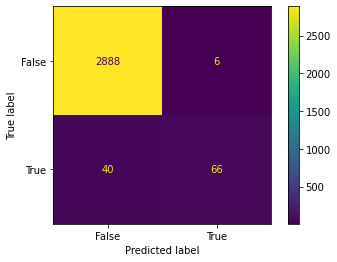

In [49]:
# Importazione librerie
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

y_predM = modello.predict(X_test)

# Creazione matrice di confusione
matrixConf = metrics.confusion_matrix(y_test, y_predM)

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = matrixConf, display_labels = [False, True])

matrix.plot()
plt.show()